# The Linux Commandline (bash)
## 8/29/2023

<a href="?print-pdf">print view</a><br>
<a href="bash.ipynb">notebook</a>

In [1]:
%%html
<script src="https://bits.csb.pitt.edu/asker.js/lib/asker.js"></script>
<style>
.reveal pre { font-size: 100%; overflow-x: auto; overflow-y: auto;}
.reveal h1 { font-size: 2em}
.reveal ol {display: block;}
.reveal ul {display: block;}
.reveal .slides>section>section.present { max-height: 100%; overflow-y: auto;}

.jp-OutputArea-output { padding: 0; }
</style>


<script>
$3Dmolpromise = new Promise((resolve, reject) => { 
    require(['https://3Dmol.org/build/3Dmol.js'], function(){       
            resolve();});
});
require(['https://cdnjs.cloudflare.com/ajax/libs/Chart.js/2.2.2/Chart.js'], function(Ch){
 Chart = Ch;
});

$('head').append('<link rel="stylesheet" href="https://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');


//the callback is provided a canvas object and data 
var chartmaker = function(canvas, labels, data) {
  var ctx = $(canvas).get(0).getContext("2d");
     var dataset = {labels: labels,                     
    datasets:[{
     data: data,
     backgroundColor: "rgba(150,64,150,0.5)",
         fillColor: "rgba(150,64,150,0.8)",    
  }]};
  var myBarChart = new Chart(ctx,{type:'bar',data:dataset,options:{legend: {display:false},
        scales: {
            yAxes: [{
                ticks: {
                    min: 0,
                }
            }]}}});
};

$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>


# Linux

*Happy Birthday Linux! Here's your cake:*
<img src="https://images-cdn.9gag.com/photo/ay84g8M_700b.jpg" width="500px">

In [2]:
%%html
<div id="prepared" style="width: 500px"></div>
<script>
	jQuery("#prepared").asker({
	    id: "prepared",
	    question: "Have you used the Linux commandline before?",
		answers: ["Yes","No"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();

</script>


# Installing (Linux)

For this class we expect you to do your work on your own computing resources. 

Your code will be evaluated using Ubuntu 22.04.  You use the system package manager (**apt**) and the python package manager (**pip**) to install additional software needed for the course.  **sudo** runs a command with super user privileges.

```
sudo apt install git vim wget python-pip ipython-notebook python-tk clustalw libcairo2 libcairo2-dev libxml2 libxml2-dev cmake libeigen3-dev swig graphviz python-pygraphviz imagemagick python3-openbabel

sudo pip3 install pysb matplotlib biopython prody MDAnalysis cython sklearn Pillow py3Dmol pandas pydotplus pydot bionetgen
```




# macOS

Macs also have a built-in commandline (Terminal.app).  Many of the packages we use are also available of OS X.  However, keep in mind your assignments must run properly on Ubuntu 22.04.

MacPorts is most convenient for installing software (https://www.macports.org), but not all packages that we use are readily available.

# Windows

As of **Windows 10**, can [install Linux Subsystem](https://docs.microsoft.com/en-us/windows/wsl/install-win10).  In theory should work just like Ubuntu and is much less cumbersome to use than the Windows shell.

# Colab

[Google Colab](https://colab.research.google.com/) provides a cloud-based solution from running python.  You can run bash commands by prefixing them with `!`.

Since your colab runtime will eventually timeout, we strongly recommend install Jupyter notebook locally on your own machine rather than using cloud resources. 

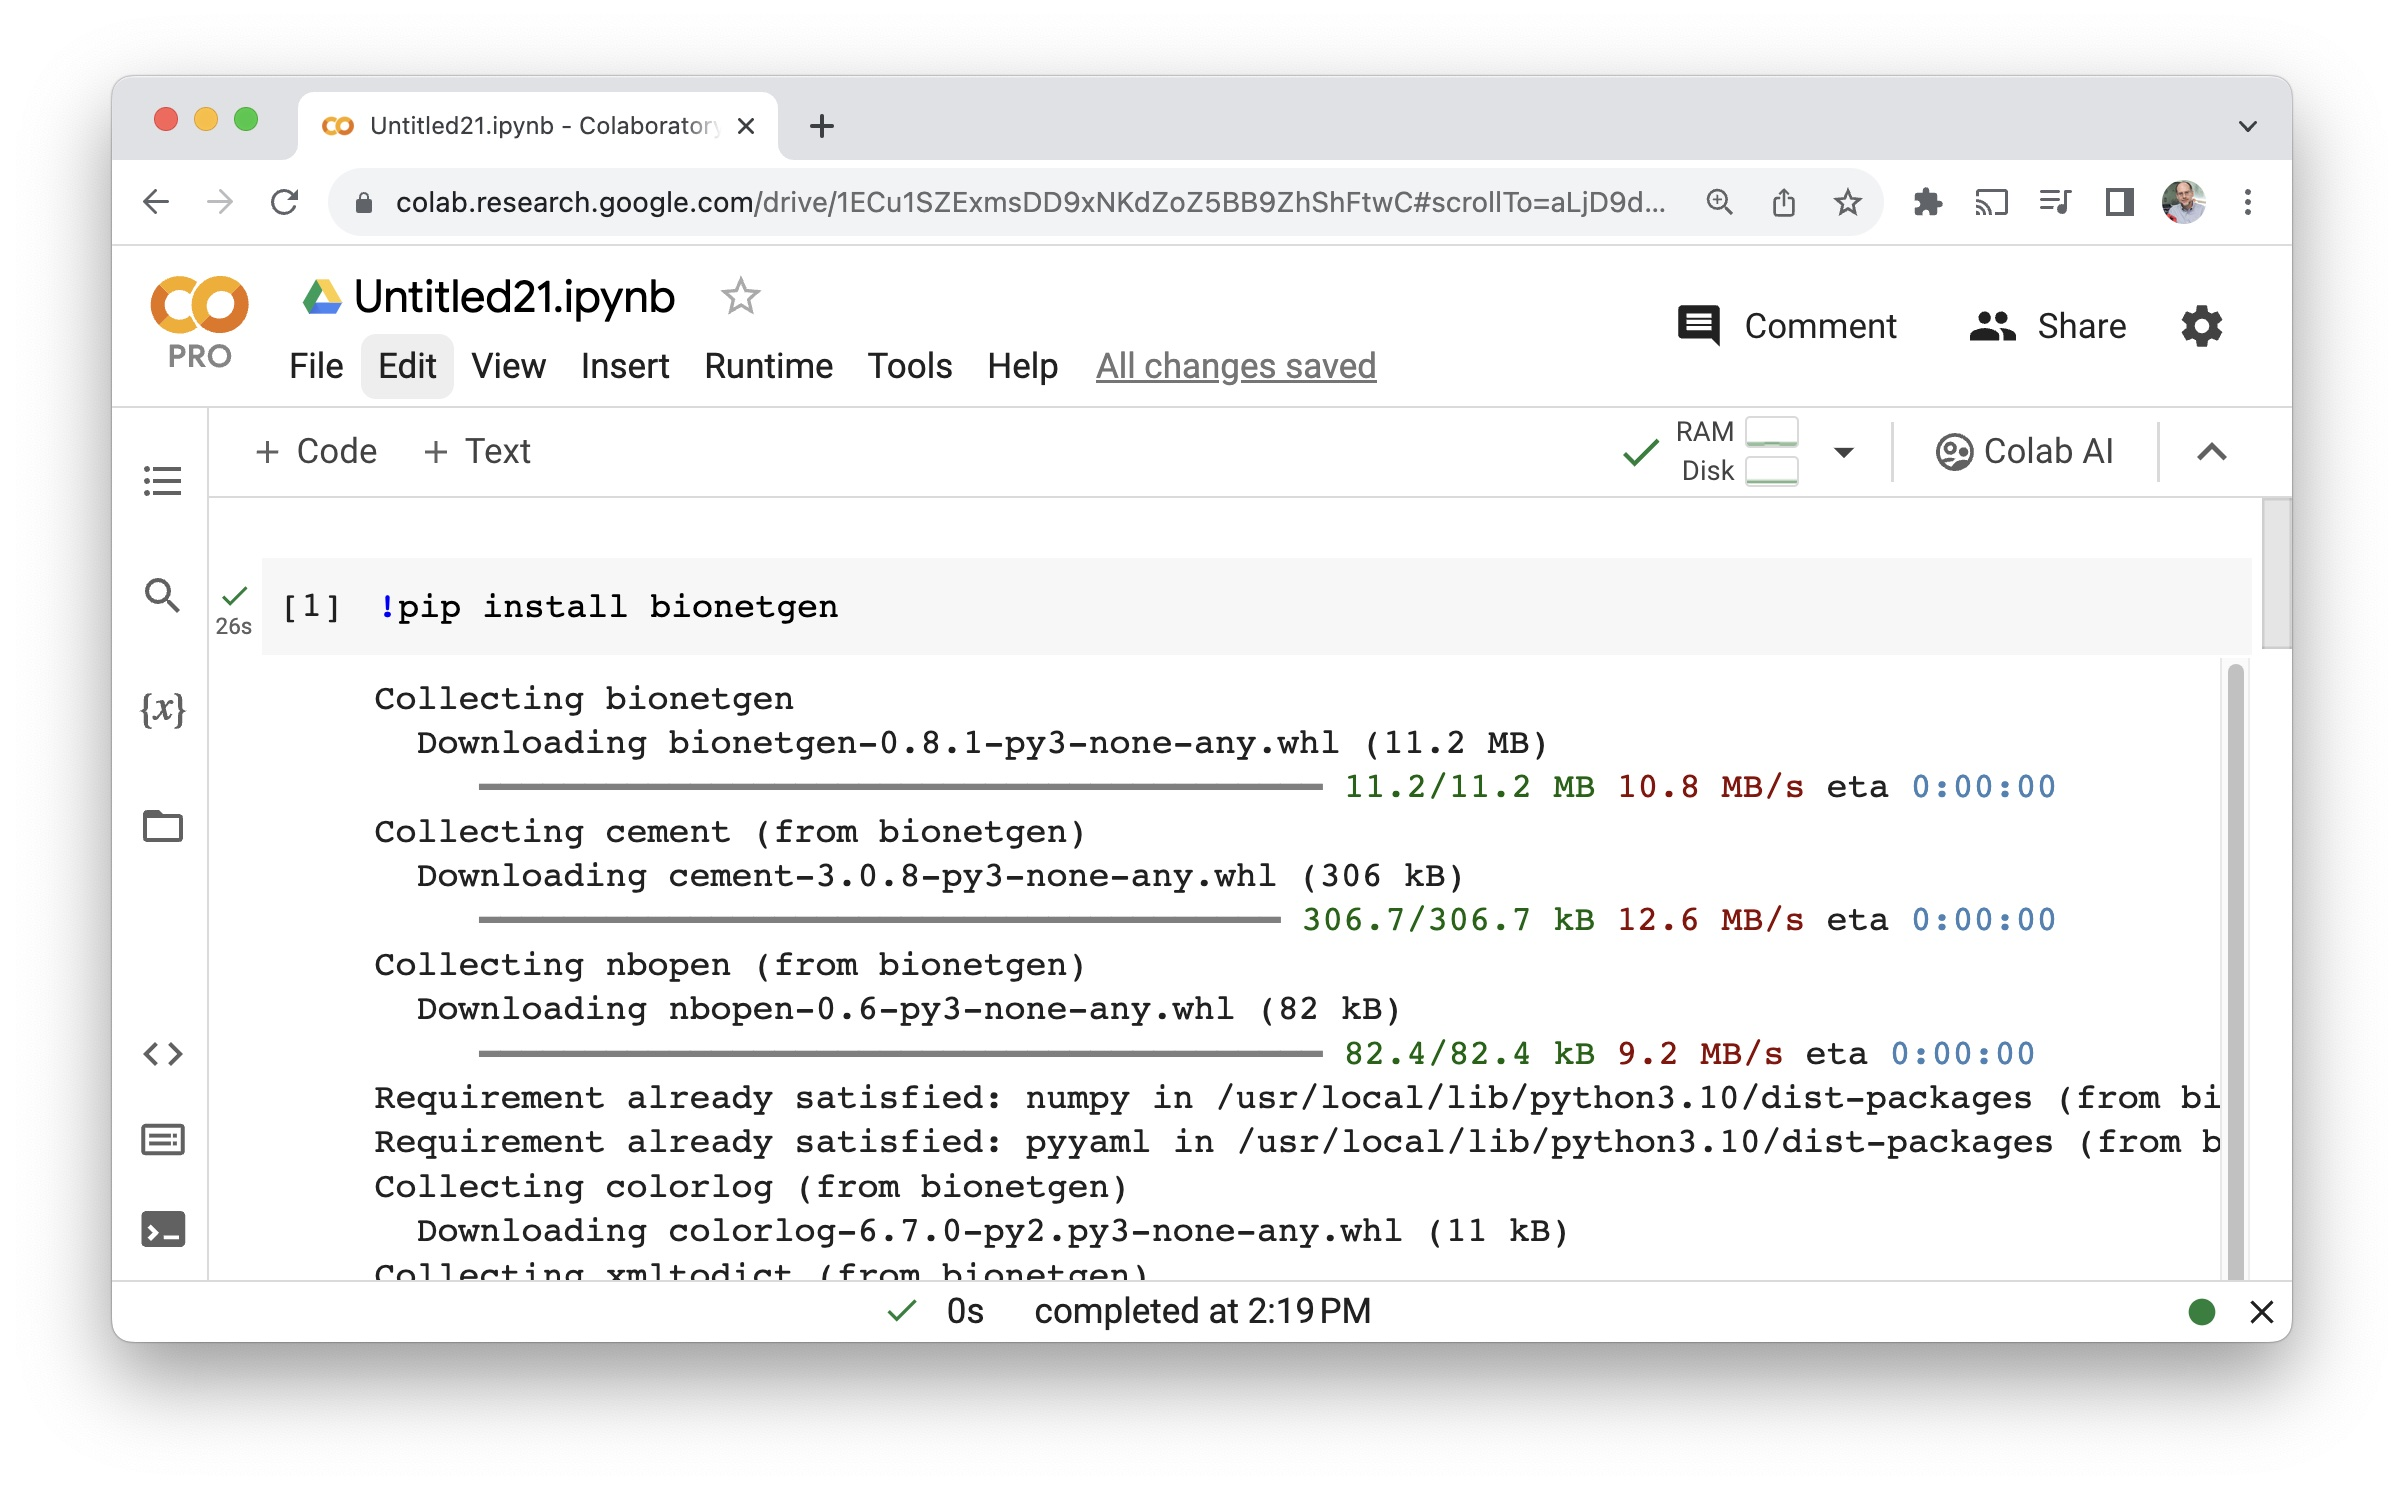

# Commands

The first word you type is the program you want to run.  <tt>bash</tt> will search <tt>PATH</tt> environment variable for an appropriately named executable and run it with the specified arguments.

* <tt>ipython<tt> - start interactive python shell (more later)
* <tt>ssh</tt> *hostname*  - connect to *hostname*
* <tt>passwd</tt> - change your password
* <tt>nano</tt> - a user-friendly text editor



# A BASH cheatsheet

https://mscbio2025.github.io/notes/bash_cheatsheet.pdf

# ls - directory listing
```bash
$ ls -l
total 8
-rw-rw-r-- 1 dkoes dkoes   19 Sep  3 09:08 hello.txt
drwxrwxr-x 2 dkoes dkoes 4096 Sep  3 09:08 lecture
$ pwd
/home/dkoes/intro
$ cd lecture/../..
$ pwd
```

In [3]:
%%html
<div id="question1" style="width: 500px"></div>
<script>

	jQuery('#question1').asker({
	    id: "cdquestion",
	    question: "What prints out?",
		answers: ["~/","/home/dkoes", "/home/dkoes/intro","/home/dkoes/intro/lecture","An Error"],
		extra: ["","","","","",""],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();

</script>

```bash
$ ls -l
total 8
-rw-rw-r-- 1 dkoes dkoes   19 Sep  3 09:08 hello.txt
drwxrwxr-x 2 dkoes dkoes 4096 Sep  3 09:08 lecture
$ ls *.txt
```


In [4]:
%%html
<div id="question2" style="width: 500px"></div>
<script>

	jQuery('#question2').asker({
	    id: "lsquestion",
	    question: "What prints out?",
		answers: ["hello.txt","*.txt", "hello.txt lecture", "An Error"],
		extra: ["","","","","",""],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();

</script>

# Spacing Out

<tt>du</tt> - disk usage of files/directores
```bash
[dkoes@n052 tmp]$ du -s
146564	.
[dkoes@n052 tmp]$ du -sh
144M	.
[dkoes@n052 tmp]$ du -sh intro
4.0K	intro
```

<tt>df</tt> - usage of full disk
```bash
[dkoes@n052 tmp]$ df -h .
Filesystem      Size  Used Avail Use% Mounted on
pulsar:/home     37T   28T  9.3T  75% /net/pulsar/home
```

# Dude, where's my stuff?

<tt>locate</tt> find a file system wide
<tt>find</tt> search directory tree
<tt>which</tt> print location of a command
<tt>man</tt> print manual page of a command


# Save the Environment

<tt>NAME=value</tt>  set NAME equal to value **No spaces around equals**

<tt>export NAME=value</tt> set NAME equal to value and make it stick

`$` *dereference* variable
```bash
user@python$ X=3
user@python$ echo $X
3
user@python$ X=hello
user@python$ echo $X
hello
user@python$ echo X
X
```

# Getting at your variables

&nbsp;

In [5]:
%%html
<div id="questionvarprint" style="width: 500px; "></div>
<script>

	jQuery('#questionvarprint').asker({
	    id: "varquestion",
	    question: "Which does <b>not</b> print the value of X?",
		answers: ["echo $X","echo ${X}","echo '$X'","echo \"$X\""],
		extra: ["","","","","",""],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();

</script>

```bash
$ ls -l
total 8
-rw-rw-r-- 1 dkoes dkoes   19 Sep  3 09:08 hello.txt
drwxrwxr-x 2 dkoes dkoes 4096 Sep  3 09:08 lecture
$ ls '*.txt'
```

In [6]:
%%html
<div id="questionls2" style="width: 500px"></div>
<script>
	jQuery('#questionls2').asker({
	    id: "ls2question",
	    question: "What prints out?",
		answers: ["hello.txt","*.txt", "hello.txt lecture", "An Error"],
		extra: ["","","","","",""],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();

</script>

# Capturing Output

```
`cmd`
``` 
evaluates to output of cmd
```bash
$ FILES=`ls`
$ echo $FILES 
hello.txt lecture
```

# Your Environment

<tt>env</tt> list all set environment variables

<tt>PATH</tt> where shell searches for commands

<tt>LD_LIBRARY_PATH</tt> library search path

<tt>PYTHONPATH</tt> where python searches for modules

<tt>.bashrc</tt> initialization file for bash - set PATH etc here


# History

<tt>history</tt> show commands previously issued

<tt>up arrow</tt> cycle through previous commands

<tt>Ctrl-R</tt> search through history for command **AWESOME**

<tt>.bash_history</tt> file that stores the history

<tt>HISTCONTROL</tt> environment variable that sets history options: ignoredups

<tt>HISTSIZE</tt> size of history buffer

# Shortcuts

<tt>Tab</tt> autocomplete

<tt>Ctrl-D</tt>  EOF/logout/exit

<tt>Ctrl-A</tt>  go to beginning of line

<tt>Ctrl-E</tt>  go to end of line

<tt>alias new=cmd</tt>  

make a nickname for a command
```bash
$ alias l='ls -l'
$ alias
$ l
```


## Loops

```bash
for i in x y z
do
 echo $i
done

for i in *.txt
do
 echo $i
done
```

<a href="http://tldp.org/LDP/abs/html/loops.html">Lots more... (TLDP)</a>

# String Manipulation

http://tldp.org/LDP/abs/html/string-manipulation.html

```bash
$ i="ovolo"
$ echo ${i%o}
```

In [7]:
%%html
<div id="stringm" style="width: 500px"></div>
<script>


	jQuery('#stringm').asker({
	    id: "stringm",
	    question: "What prints out?",
		answers: ["ovolo","volo", "ovol","vl","An Error"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Batch processing files


```bash
for file in *.png
do
 convert $file ${file%.png}.tif
done
```

# Assignment 1
 * Due in a week
 * Use GradeScope to hand-in
 * **Test your code before submitting**